# **Reto 01**

En este reto hemos de particionar datos en tres grupos. ¡Utiliza tu dataset si así lo consideras! Para este reto utilizaré un dataset de blobs, pero tú usa el dataset que consideres útil.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto crimenes_locacion.csv')
df1.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


In [3]:
x = df1[['latitud', 'longitud']].to_numpy()
x

array([[-15.06871225,   0.15799137],
       [ -4.06591279,  12.49176847],
       [  3.14117931, -12.09060112],
       ...,
       [  5.21041648,  -6.19654707],
       [  6.20429624,  10.32058246],
       [  4.85253785,  -8.4458268 ]])

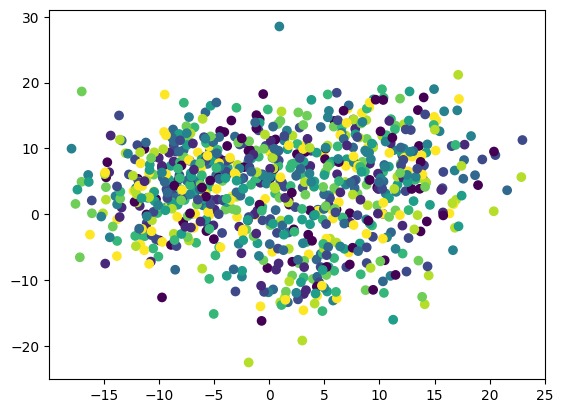

In [4]:
plt.scatter(x[:,0], x[:,1], c=df1['codigo_crimen'])
plt.show()

In [5]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
  temp_size = porcentaje_validacion + porcentaje_prueba
  x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size=temp_size)
  if(porcentaje_validacion > 0):
    test_size = porcentaje_prueba/temp_size
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
  else:
    return [x_train, None, x_temp, y_train, None, y_temp]
  return [x_train, x_val, x_test, y_train, y_val, y_test]

In [6]:
#Particionando en 60% entrenamiento, 10% validacion, 30% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,df1['codigo_crimen'],0.60,0.10,0.30)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(509, 2)
(85, 2)
(255, 2)


In [7]:
#Particionando en 70% entrenamiento, 10% validacion, 20% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,df1['codigo_crimen'], 0.70, 0.10, 0.20)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(594, 2)
(85, 2)
(170, 2)


# Reto 02

En este reto haremos K-fold de datos! si tienes un dataset para tu proyecto final, aprovecha para usarlo. En mi caso utilizaremos 1000 blobs.

Nota: Si vas a hacer K-fold y usarlo en la vida real, no uses un random_seed.

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold

In [9]:
df2 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto crimenes_locacion.csv')
df2.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


In [10]:
x = df1[['latitud', 'longitud']].to_numpy()
x

array([[-15.06871225,   0.15799137],
       [ -4.06591279,  12.49176847],
       [  3.14117931, -12.09060112],
       ...,
       [  5.21041648,  -6.19654707],
       [  6.20429624,  10.32058246],
       [  4.85253785,  -8.4458268 ]])

In [11]:
y = df2['codigo_crimen']
y

0      8
1      0
2      1
3      8
4      3
      ..
844    3
845    0
846    2
847    6
848    5
Name: codigo_crimen, Length: 849, dtype: int64

In [12]:
K = 4
random_seed = 48
aleatorio = True

kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
  print('Ciclo: '+str(ciclo))

  print('Usare '+str(x[indices_train].shape)+' datos para entrenar (entrada)')
  print('Usare '+str(y[indices_train].shape)+' datos para entrenar (salida)')

  print('Usare '+str(x[indices_test].shape)+' datos para probar (entrada)')
  print('Usare '+str(x[indices_test].shape)+' datos para probar (salida)')

  ciclo+=1

Ciclo: 1
Usare (636, 2) datos para entrenar (entrada)
Usare (636,) datos para entrenar (salida)
Usare (213, 2) datos para probar (entrada)
Usare (213, 2) datos para probar (salida)
Ciclo: 2
Usare (637, 2) datos para entrenar (entrada)
Usare (637,) datos para entrenar (salida)
Usare (212, 2) datos para probar (entrada)
Usare (212, 2) datos para probar (salida)
Ciclo: 3
Usare (637, 2) datos para entrenar (entrada)
Usare (637,) datos para entrenar (salida)
Usare (212, 2) datos para probar (entrada)
Usare (212, 2) datos para probar (salida)
Ciclo: 4
Usare (637, 2) datos para entrenar (entrada)
Usare (637,) datos para entrenar (salida)
Usare (212, 2) datos para probar (entrada)
Usare (212, 2) datos para probar (salida)


# Reto 03

En este reto vamos a generar un Leave-one-out cross validation (LOOCV), y para ello necesitarás un dataset. Para efectos de este reto, yo usare 1000 blobs, lo que llevará 1000 ciclos.

In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold

In [16]:
df3 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto crimenes_locacion.csv')
df3.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


In [17]:
x = df1[['latitud', 'longitud']].to_numpy()
x

array([[-15.06871225,   0.15799137],
       [ -4.06591279,  12.49176847],
       [  3.14117931, -12.09060112],
       ...,
       [  5.21041648,  -6.19654707],
       [  6.20429624,  10.32058246],
       [  4.85253785,  -8.4458268 ]])

In [18]:
y = df2['codigo_crimen']
y

0      8
1      0
2      1
3      8
4      3
      ..
844    3
845    0
846    2
847    6
848    5
Name: codigo_crimen, Length: 849, dtype: int64

In [19]:
K = y.shape[0]
random_seed = 48
aleatorio = True

kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
    print("Ciclo: "+str(ciclo))

    print("Usare "+str(x[indices_train].shape)+" datos para entrenar (entrada)")
    print("Usare "+str(y[indices_train].shape)+" datos para entrenar (salida)")

    print("Usare "+str(x[indices_test].shape)+" datos para probar (entrada)")
    print("Usare "+str(y[indices_test].shape)+" datos para probar (salida)")
    ciclo+=1

Ciclo: 1
Usare (848, 2) datos para entrenar (entrada)
Usare (848,) datos para entrenar (salida)
Usare (1, 2) datos para probar (entrada)
Usare (1,) datos para probar (salida)
Ciclo: 2
Usare (848, 2) datos para entrenar (entrada)
Usare (848,) datos para entrenar (salida)
Usare (1, 2) datos para probar (entrada)
Usare (1,) datos para probar (salida)
Ciclo: 3
Usare (848, 2) datos para entrenar (entrada)
Usare (848,) datos para entrenar (salida)
Usare (1, 2) datos para probar (entrada)
Usare (1,) datos para probar (salida)
Ciclo: 4
Usare (848, 2) datos para entrenar (entrada)
Usare (848,) datos para entrenar (salida)
Usare (1, 2) datos para probar (entrada)
Usare (1,) datos para probar (salida)
Ciclo: 5
Usare (848, 2) datos para entrenar (entrada)
Usare (848,) datos para entrenar (salida)
Usare (1, 2) datos para probar (entrada)
Usare (1,) datos para probar (salida)
Ciclo: 6
Usare (848, 2) datos para entrenar (entrada)
Usare (848,) datos para entrenar (salida)
Usare (1, 2) datos para proba